# Education Spending and Citizen Happiness: A Comparative Analysis

## Executive Summary

The pursuit of happiness and well-being has become increasingly paramount in societal discourse, alongside traditional economic indicators. This study delves into the correlation between a country's education spending and the happiness of its citizens, as well as the specific relationship between tertiary education expenditure and national happiness. By analyzing datasets from the World Happiness Report 2023 and the World Bank, this study aims to shed light on these interconnections.

## Introduction

In recent years, there has been a growing recognition of the importance of happiness and well-being in addition to conventional economic metrics. Understanding the factors that contribute to national happiness is crucial for policymakers seeking to improve societal welfare. Education is considered a key determinant of individual well-being, as it enhances life chances and expands opportunities. This study investigates whether a country's investment in education, both overall and in tertiary education specifically, correlates with the happiness of its populace.

## Data Sources

This study draws upon data from two primary sources:

1. **World Happiness Report 2023**:
   - The World Happiness Report, published annually by the Sustainable Development Solutions Network, provides insights into national happiness levels across the globe. The 2023 edition, edited by Helliwell et al., serves as a comprehensive resource for understanding subjective well-being worldwide. The report is freely downloadable, implying that the work is in the public domain as long as the citation below is given:
     - Helliwell, J. F., Layard, R., Sachs, J. D., Aknin, L. B., De Neve, J.-E., & Wang, S. (Eds.). (2023). World Happiness Report 2023 (11th ed.). Sustainable Development Solutions Network.
   - Access the World Happiness Report [here](https://worldhappiness.report/).

2. **World Bank Open Data Portal**:
   - The World Bank Open Data portal offers a wide array of datasets, including information on education expenditure as a percentage of GDP for various countries. This data, obtained under the Creative Commons Attribution 4.0 International license (CC-BY 4.0), provides valuable insights into countries' investments in education.
   - Access the World Bank Open Data portal [here](https://data.worldbank.org/).

**Data Collection Dates**:

- The World Happiness Report 2023 data was retrieved from the report's website on May 30, 2023.
- Data on education expenditure from the World Bank Open Data portal was accessed on August 19, 2022.



## Research Objectives

The primary objective of this study is to investigate the potential correlation between a country's expenditure on education and the happiness levels of its population. Specifically, we aim to address the following research questions:

### 1. Is there a relationship between the amount that a country spends on education as a proportion of its GDP, and the happiness of that country's citizens?

### 2. Is there a relationship between the amount that a country spends on tertiary education as a proportion of its GDP, and the happiness of that country's citizens? 


## Data 
You can find data in the `data` directory as:

    data/happiness_2023.xls
    data/world_bank_education_data.csv

## Analysis

### 1. Import the Datasets

In [1]:
# This cell imports the standard pandas library, numpy library, matplotlib library, seaborn library and chardet library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [2]:
!ls data

countries.geojson   population_density.csv  world_bank_education_data.csv
happiness_2023.xls  wcvp


First, look at the general characteristics of the data


##### Happiness_2023

In [3]:
!head -5 data/happiness_2023.xls

C a l i b r i   L i g h t 1  , 6 �    C a l i b r i 1   6 �    C a l i b r i 1  �  6 �    C a l i b r i 1  �    �    C a l i b r i 1  �    �    C a l i b r i 1  �   < �    C a l i b r i 1  �   > �    C a l i b r i 1  �  ? �    C a l i b r i 1  �  4 �    C a l i b r i 1  �   4 �    C a l i b r i 1  �  	 �    C a l i b r i 1  �   
 �    C a l i b r i 1  �   �    C a l i b r i 1  �   �    C a l i b r i 1  �   	 �    C a l i b r i 1  �    �    C a l i b r i     "$"#,##0;\-"$"#,##0    "$"#,##0;[Red]\-"$"#,##0    "$"#,##0.00;\-"$"#,##0.00#    "$"#,##0.00;[Red]\-"$"#,##0.005 * 0  _-"$"* #,##0_-;\-"$"* #,##0_-;_-"$"* "-"_-;_-@_-, ) '  _-* #,##0_-;\-* #,##0_-;_-* "-"_-;_-@_-= , 8  _-"$"* #,##0.00_-;\-"$"* #,##0.00_-;_-"$"* "-"??_-;_-@_-4 + /  _-* #,##0.00_-;\-* #,##0.00_-;_-* "-"??_-;_-@_-
 �   0.000�      ��            � �     ��            � �    

Check the file using Microsoft Excel.

head:

<img src="images/excel_1.png">

tail:

<img src="images/excel_2.png">

In [4]:
excel_file = 'data/happiness_2023.xls'

In [5]:
# Check encoding
chardet.detect(open(excel_file,'rb').read())

{'encoding': 'Windows-1254',
 'confidence': 0.33766601783790756,
 'language': 'Turkish'}

happiness_2023 file:
- 138 rows with headings 
- encoding:  Windows-1254   

#####  World Bank Education

In [6]:
!head -5 data/world_bank_education_data.csv

In [7]:
!tail -5 data/world_bank_education_data.csv

In [8]:
!wc -l data/world_bank_education_data.csv

2610 data/world_bank_education_data.csv


In [9]:
bank_education = 'data/world_bank_education_data.csv'

In [10]:
# Check encoding
chardet.detect(open(bank_education,'rb').read())

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

world_bank_education_data file:
- 2609 rows with headings ( there may be potentially missing values towards the end of the rows.)
- encoding:  Windows-1252   

##### Import the data

In [11]:
happiness_df = pd.read_excel(excel_file)
happiness_df.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.8042,0.036162,7.875078,7.733322,10.792010,0.968770,71.149994,0.961408,-0.018824,0.181745,1.777825,1.888380,1.584900,0.534574,0.771510,0.126331,0.535299,2.363241
1,Denmark,7.5864,0.041028,7.666815,7.505985,10.962164,0.954112,71.250145,0.933533,0.134242,0.195814,1.777825,1.949406,1.547875,0.537302,0.734416,0.208459,0.525221,2.083766
2,Iceland,7.5296,0.048612,7.624879,7.434321,10.895531,0.982533,72.050018,0.936349,0.210987,0.667848,1.777825,1.925508,1.619666,0.559096,0.738164,0.249635,0.187119,2.250382
3,Israel,7.4729,0.031609,7.534853,7.410946,10.638705,0.943344,72.697205,0.808866,-0.023080,0.708094,1.777825,1.833398,1.520674,0.576730,0.568518,0.124048,0.158292,2.691290
4,Netherlands,7.4030,0.029294,7.460416,7.345583,10.942279,0.930499,71.550018,0.886875,0.212686,0.378929,1.777825,1.942274,1.488228,0.545473,0.672327,0.250547,0.394062,2.110044


In [12]:
happiness_df.tail()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
132,Congo (Kinshasa),3.2072,0.095369,3.394124,3.020277,7.006671,0.651610,55.375000,0.663798,0.085998,0.833752,1.777825,0.530779,0.783747,0.104758,0.375472,0.182573,0.068287,1.161580
133,Zimbabwe,3.2035,0.060865,3.322795,3.084205,7.640998,0.689918,54.049889,0.654055,-0.046230,0.765582,1.777825,0.758279,0.880513,0.068653,0.362508,0.111627,0.117115,0.904856
134,Sierra Leone,3.1376,0.082441,3.299184,2.976016,7.394014,0.555251,54.899853,0.660367,0.104929,0.857780,1.777825,0.669699,0.540343,0.091811,0.370907,0.192731,0.051077,1.221006
135,Lebanon,2.3922,0.044495,2.479410,2.304990,9.477677,0.529754,66.148819,0.473900,-0.140915,0.891104,1.777825,1.416999,0.475936,0.398308,0.122771,0.060824,0.027208,-0.109798
136,Afghanistan,1.8590,0.032506,1.922712,1.795288,7.324032,0.341341,54.712410,0.381642,-0.081011,0.847215,1.777825,0.644600,0.000000,0.086704,0.000000,0.092965,0.058644,0.976065


In [13]:
happiness_df.shape

(137, 19)

happiness_df has data with 136 rows and 19 columns

In [14]:
# World bank education
wbe = pd.read_csv(bank_education, encoding='Windows-1252')
wbe.head()


,Country Name,Country Code,Series,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,Proportion of 15-24 year-olds enrolled in voca...,UIS.EV1524P.2T5.V,..,..,..,0.4446,0.35962,0.3281,0.71191,0.97014,0.92568,..
1,Afghanistan,AFG,Proportion of 15-24 year-olds enrolled in voca...,UIS.EV1524P.2T5.V.M,..,..,..,0.79717,0.64297,0.56797,1.19099,1.55681,1.48169,..
2,Afghanistan,AFG,Proportion of 15-24 year-olds enrolled in voca...,UIS.EV1524P.2T5.V.F,..,..,..,0.06773,0.05733,0.07289,0.20353,0.34877,0.33749,..
3,Afghanistan,AFG,Government expenditure on primary education as...,UIS.XGDP.1.FSGOV,2.16201,2.14557,1.53942,2.07295,2.18412,1.84589,1.83096,1.79364,..,..
4,Afghanistan,AFG,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,3.47945,3.46201,2.6042,3.45446,3.69522,3.2558,4.22836,4.05887,..,..


In [15]:
wbe.tail()

,Country Name,Country Code,Series,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
2604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2607,Data from database: Education Statistics - All...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,Last Updated: 12/20/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
wbe.shape

(2609, 14)

The dataset 'wbe' contains 2609 rows and 14 columns, including headers. However, there are many null values at the end of the dataset. Therefore, it requires cleaning.

### 2. Clean and Reshape the Data

First, clean the data of happiness_df and reshape it.

In [17]:
# happiness_df
happiness_df.isnull().sum()

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

Although there are some null values, considering the task, only the columns 'Country name' and 'Ladder score' might be used, and there seems to be no need to remove null values.

In [18]:
# Check types
happiness_df.dtypes

Country name                                   object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual         

In [19]:
# Further check
happiness_df.nunique()

Country name                                  137
Ladder score                                  137
Standard error of ladder score                137
upperwhisker                                  137
lowerwhisker                                  137
Logged GDP per capita                         137
Social support                                137
Healthy life expectancy                       136
Freedom to make life choices                  137
Generosity                                    137
Perceptions of corruption                     137
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              137
Explained by: Social support                  137
Explained by: Healthy life expectancy         136
Explained by: Freedom to make life choices    137
Explained by: Generosity                      137
Explained by: Perceptions of corruption       137
Dystopia + residual                           136
dtype: int64

In [20]:
# Check the country names
happiness_df['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands', 'Sweden',
       'Norway', 'Switzerland', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Canada', 'Ireland', 'United States', 'Germany',
       'Belgium', 'Czechia', 'United Kingdom', 'Lithuania', 'France',
       'Slovenia', 'Costa Rica', 'Romania', 'Singapore',
       'United Arab Emirates', 'Taiwan Province of China', 'Uruguay',
       'Slovakia', 'Saudi Arabia', 'Estonia', 'Spain', 'Italy', 'Kosovo',
       'Chile', 'Mexico', 'Malta', 'Panama', 'Poland', 'Nicaragua',
       'Latvia', 'Bahrain', 'Guatemala', 'Kazakhstan', 'Serbia', 'Cyprus',
       'Japan', 'Croatia', 'Brazil', 'El Salvador', 'Hungary',
       'Argentina', 'Honduras', 'Uzbekistan', 'Malaysia', 'Portugal',
       'South Korea', 'Greece', 'Mauritius', 'Thailand', 'Mongolia',
       'Kyrgyzstan', 'Moldova', 'China', 'Vietnam', 'Paraguay',
       'Montenegro', 'Jamaica', 'Bolivia', 'Russia',
       'Bosnia and Herzegovina', 'Colombia', 'Domin

Potentially, when concatenating the data of 'happiness_df' and the data of 'wbe', some countries such as Congo (Kinshasa) and Hong Kong S.A.R. of China, might have errors during the combination due to variations in naming countries.

In [21]:
happiness_df['Ladder score'].describe()

count    137.000000
mean       5.539755
std        1.139908
min        1.859000
25%        4.723900
50%        5.684300
75%        6.333800
max        7.804200
Name: Ladder score, dtype: float64

The ladder scores are widely distributed, ranging from 1.85 to 7.80.

Now, select only necessary columns.

In [22]:
selected_happiness_df = happiness_df[['Country name', 'Ladder score']]
selected_happiness_df.head(2)

,Country name,Ladder score
0,Finland,7.8042
1,Denmark,7.5864


The values of 'Ladder score' changed to two decimal places, and the column names are also changed.

In [23]:
# Rename columns
selected_happiness_df = selected_happiness_df.rename(columns={'Country name': 'Country', 'Ladder score': 'Happiness index'})

# Round 'Ladder score' to two decimal places
selected_happiness_df['Happiness index'] = selected_happiness_df['Happiness index'].round(2)


selected_happiness_df.head(2)

,Country,Happiness index
0,Finland,7.80
1,Denmark,7.59


Next, clean the data of wbe and reshape it.

In [24]:
#wbe
wbe.isnull().sum()

Country Name     3
Country Code     5
Series           5
Series Code      5
2010 [YR2010]    5
2011 [YR2011]    5
2012 [YR2012]    5
2013 [YR2013]    5
2014 [YR2014]    5
2015 [YR2015]    5
2016 [YR2016]    5
2017 [YR2017]    5
2018 [YR2018]    5
2019 [YR2019]    5
dtype: int64

In [25]:
# Identify the null values
wbe.tail(10)

,Country Name,Country Code,Series,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
2599,Zimbabwe,ZWE,Government expenditure on upper secondary educ...,UIS.XGDP.3.FSGOV,..,..,0.81291,0.8173,0.84489,..,..,..,..,..
2600,Zimbabwe,ZWE,Government expenditure on lower secondary educ...,UIS.XGDP.2.FSGOV,..,..,0.77019,0.77801,0.80427,..,..,..,..,..
2601,Zimbabwe,ZWE,Government expenditure on pre-primary educatio...,UIS.XGDP.0.FSGOV,..,..,0.11984,0.11943,0.12414,..,..,..,..,..
2602,Zimbabwe,ZWE,Government expenditure on secondary and post-s...,UIS.XGDP.2T4.V.FSGOV,..,..,0.32283,0.35051,0.39965,..,..,..,..,..
2603,Zimbabwe,ZWE,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,0.35228,..,1.19565,1.13793,1.03321,..,..,..,..,..
2604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2607,Data from database: Education Statistics - All...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,Last Updated: 12/20/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Null values and unnecessary data have been removed from the last 5 rows of the DataFrame.

In [26]:
wbe2 = wbe.dropna(inplace=False)

display(wbe2.isnull().sum())
display(wbe2.tail(2))


Country Name     0
Country Code     0
Series           0
Series Code      0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
2016 [YR2016]    0
2017 [YR2017]    0
2018 [YR2018]    0
2019 [YR2019]    0
dtype: int64

,Country Name,Country Code,Series,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
2602,Zimbabwe,ZWE,Government expenditure on secondary and post-s...,UIS.XGDP.2T4.V.FSGOV,..,..,0.32283,0.35051,0.39965,..,..,..,..,..
2603,Zimbabwe,ZWE,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,0.35228,..,1.19565,1.13793,1.03321,..,..,..,..,..


In [27]:
# Check types
wbe2.dtypes

Country Name     object
Country Code     object
Series           object
Series Code      object
2010 [YR2010]    object
2011 [YR2011]    object
2012 [YR2012]    object
2013 [YR2013]    object
2014 [YR2014]    object
2015 [YR2015]    object
2016 [YR2016]    object
2017 [YR2017]    object
2018 [YR2018]    object
2019 [YR2019]    object
dtype: object

The type of each year needs to be changed. For now, the data types are retained, and the data check is continued.

In [28]:
# Look at the contents of 'Series'
wbe2['Series'].unique()

array(['Proportion of 15-24 year-olds enrolled in vocational education, both sexes (%)',
       'Proportion of 15-24 year-olds enrolled in vocational education, male (%)',
       'Proportion of 15-24 year-olds enrolled in vocational education, female (%)',
       'Government expenditure on primary education as % of GDP (%)',
       'Government expenditure on education as % of GDP (%)',
       'Government expenditure on post-secondary non-tertiary education as % of GDP (%)',
       'Government expenditure on secondary education as % of GDP (%)',
       'Government expenditure on upper secondary education as a percentage of GDP (%)',
       'Government expenditure on lower secondary education as a percentage of GDP (%)',
       'Government expenditure on pre-primary education as % of GDP (%)',
       'Government expenditure on secondary and post-secondary non-tertiary vocational education as % of GDP (%)',
       'Government expenditure on tertiary education as % of GDP (%)'],
      dtyp

To execute the task, 'Government expenditure on education as % of GDP (%)' and 'Government expenditure on tertiary education as % of GDP (%)' from the 'Series' should be chosen.

##### Government expenditure on education as % of GDP (%)

In [29]:
# Collect the data whose column:Series has 'Government expenditure on education as % of GDP (%)'
education = wbe2[wbe2['Series'] == 'Government expenditure on education as % of GDP (%)']
education.head()

,Country Name,Country Code,Series,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
4,Afghanistan,AFG,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,3.47945,3.46201,2.6042,3.45446,3.69522,3.2558,4.22836,4.05887,..,..
16,Albania,ALB,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,..,..,..,3.5393,..,3.43797,3.96209,3.61172,..,..
28,Algeria,DZA,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,..,..,..,..,..,..,..,..,..,..
40,American Samoa,ASM,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,..,..,..,..,..,..,..,..,..,..
52,Andorra,AND,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,2.97663,2.98706,..,2.50616,3.07421,3.28035,3.23707,3.21709,3.24672,3.15162


In [30]:
# Check the values
education.nunique()

Country Name     217
Country Code     217
Series             1
Series Code        1
2010 [YR2010]    125
2011 [YR2011]    119
2012 [YR2012]    111
2013 [YR2013]    121
2014 [YR2014]    116
2015 [YR2015]    110
2016 [YR2016]    110
2017 [YR2017]    118
2018 [YR2018]     64
2019 [YR2019]     17
dtype: int64

Each column for the years has the value '..,' and the column for 2010 has the most number of values.

##### Government expenditure on tertiary education as % of GDP (%)

In [31]:
# Collect the data whose column:Series has  'Government expenditure on tertiary education as % of GDP (%)'
tertiary = wbe2[wbe2['Series'] == 'Government expenditure on tertiary education as % of GDP (%)']
tertiary.head()

,Country Name,Country Code,Series,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
11,Afghanistan,AFG,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,0.31427,0.3111,0.33182,0.40614,0.45862,0.51942,..,..,..,..
23,Albania,ALB,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,..,..,..,0.77613,..,0.72734,0.7567,0.68081,..,..
35,Algeria,DZA,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,..,..,..,..,..,..,..,..,..,..
47,American Samoa,ASM,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,..,..,..,..,..,..,..,..,..,..
59,Andorra,AND,Government expenditure on tertiary education a...,UIS.XGDP.56.FSGOV,0.11494,0.11472,..,0.115,0.18677,0.17959,0.19083,0.18258,0.18315,0.13299


In [32]:
# Check the values
tertiary.nunique()

Country Name     217
Country Code     217
Series             1
Series Code        1
2010 [YR2010]    113
2011 [YR2011]    107
2012 [YR2012]    103
2013 [YR2013]    115
2014 [YR2014]     99
2015 [YR2015]     94
2016 [YR2016]     90
2017 [YR2017]     87
2018 [YR2018]     36
2019 [YR2019]     17
dtype: int64

Each column for the years of the DataFrame: tertiary also has the value '..,' and the column for 2013 has the most number of values.

While the data in the World Happiness Report is from the 2023 version, 'world_bank_education' does not contain data for the 2023 version. Additionally, for each year in 'world_bank_education,' values are not distributed to all countries, and each column for the years contains null values. Therefore, the average for the 10 years is calculated for 'Government expenditure on education as a percentage of GDP (%)' and 'Government expenditure on tertiary education as a percentage of GDP (%).'

##### Government expenditure on education as a percentage of GDP (%)

In [33]:
#'Government expenditure on education as a percentage of GDP (%)'

#Remove unnecessary columns
columns_to_drop = ['Country Code', 'Series', 'Series Code']
education_2 = education.drop(columns=columns_to_drop, axis=1)

# replace the values: '..' into null values
education_2.replace('..', np.nan, inplace=True)

# Convert multiple columns to float64
years_columns = ['2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]']
education_2[years_columns] = education_2[years_columns].astype(float)

education_2.head()

,Country Name,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
4,Afghanistan,3.47945,3.46201,2.6042,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN
16,Albania,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN,NaN
28,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Andorra,2.97663,2.98706,NaN,2.50616,3.07421,3.28035,3.23707,3.21709,3.24672,3.15162


In [34]:
# Check values of years
education_2.describe()

,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
count,124.000000,118.000000,110.000000,120.000000,115.000000,109.000000,109.000000,117.000000,63.000000,16.000000
mean,4.609494,4.276345,4.306278,4.435780,4.514015,4.609555,4.495852,4.454677,4.151551,4.114044
std,1.975784,1.695065,1.661988,1.621027,1.580435,1.633203,1.443888,1.482344,1.488296,1.884528
min,1.117610,0.787440,1.496170,1.024500,1.021950,1.465560,1.370930,1.454950,1.922890,1.326320
25%,3.369240,3.037935,2.971745,3.271940,3.369035,3.437970,3.438340,3.370330,2.984160,2.978235
50%,4.502010,4.151365,4.127135,4.547150,4.617430,4.599540,4.486830,4.522820,3.696440,3.828935
75%,5.587668,5.324125,5.527228,5.534128,5.565300,5.455770,5.362670,5.412260,5.337910,5.270255
max,12.837310,10.075700,7.919140,8.494430,7.695040,12.407920,8.051940,7.963320,7.561490,7.702280


In [35]:
# Calculate the average for each row, skipping null values
education_2['average_of_education'] = education_2[years_columns].mean(axis=1, skipna=True)

education_2.head()

,Country Name,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],average_of_education
4,Afghanistan,3.47945,3.46201,2.6042,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN,3.529796
16,Albania,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN,NaN,3.637770
28,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Andorra,2.97663,2.98706,NaN,2.50616,3.07421,3.28035,3.23707,3.21709,3.24672,3.15162,3.075212


In [36]:
# Select required columns
education_3 = education_2[['Country Name','average_of_education']]

# Change column names
education_3 = education_3.rename(columns={'Country name': 'Country', 'average_of_education': 'Overall spending on education (as % of GDP)'})

# Round 'average_of_education' to two decimal places
education_3['Overall spending on education (as % of GDP)'] = education_3['Overall spending on education (as % of GDP)'].round(2)

education_3.head(2)

,Country Name,Overall spending on education (as % of GDP)
4,Afghanistan,3.53
16,Albania,3.64


In [37]:
# Check the values
education_3.describe()

,Overall spending on education (as % of GDP)
count,165.000000
mean,4.457636
std,1.823083
min,1.110000
25%,3.170000
50%,4.300000
75%,5.400000
max,12.840000


In [38]:
# Check null values
education_3.isnull().sum()

Country Name                                    0
Overall spending on education (as % of GDP)    52
dtype: int64

##### Government expenditure on tertiary education as a percentage of GDP (%)

In [39]:
#'Government expenditure on tertiary education as a percentage of GDP (%)

# Remove unnecessary columns
columns_to_drop = ['Country Code', 'Series', 'Series Code']
tertiary_2 = tertiary.drop(columns=columns_to_drop, axis=1)

# Replace the values: '..' into null values
tertiary_2.replace('..', np.nan, inplace=True)

# Convert multiple columns to float64
years_columns = ['2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]']
tertiary_2[years_columns] = tertiary_2[years_columns].astype(float)

tertiary_2.head()

,Country Name,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
11,Afghanistan,0.31427,0.31110,0.33182,0.40614,0.45862,0.51942,NaN,NaN,NaN,NaN
23,Albania,NaN,NaN,NaN,0.77613,NaN,0.72734,0.75670,0.68081,NaN,NaN
35,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Andorra,0.11494,0.11472,NaN,0.11500,0.18677,0.17959,0.19083,0.18258,0.18315,0.13299


In [40]:
# Check values of years
tertiary_2.describe()

,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
count,112.000000,106.000000,102.000000,114.000000,98.000000,93.00000,89.000000,86.000000,35.000000,1.600000e+01
mean,0.899601,0.896254,0.917397,0.963835,0.990073,0.94787,0.966089,0.947423,0.742931,7.413497e+04
std,0.516920,0.546907,0.523561,0.525316,0.538465,0.48499,0.437390,0.501950,0.586955,2.965367e+05
min,0.089680,0.080670,0.004540,0.048770,0.046020,0.00014,0.000160,0.182580,0.000000,0.000000e+00
25%,0.429947,0.380163,0.570062,0.607603,0.568952,0.55661,0.703790,0.644498,0.365035,3.221925e-01
50%,0.909400,0.910790,0.887235,0.890775,0.954660,0.87808,0.921210,0.881590,0.609300,5.764350e-01
75%,1.238938,1.237792,1.208505,1.325690,1.331808,1.31395,1.289510,1.243867,0.983605,1.182460e+00
max,2.339230,2.461860,2.607340,2.500580,2.412970,2.26720,2.146140,2.736040,3.240060,1.186148e+06


The maximum value of '2019' seems to be anomalous. Therefore, further investigation is executed.

In [41]:
# Find the index where the maximum value occurs in the 'average_of_tertiary' column
max_index = tertiary_2['2019 [YR2019]'].idxmax()

# Retrieve the entire row with the maximum 'average_of_tertiary' value
row_with_max_average = tertiary_2.loc[max_index]

# Display the row
print(row_with_max_average)

Country Name          Ecuador
2010 [YR2010]         1.61311
2011 [YR2011]         1.58125
2012 [YR2012]         1.60151
2013 [YR2013]         1.61402
2014 [YR2014]         2.12409
2015 [YR2015]         2.17512
2016 [YR2016]             NaN
2017 [YR2017]             NaN
2018 [YR2018]             NaN
2019 [YR2019]    1186147.6045
Name: 695, dtype: object


The value of 1186147.6045 for Ecuador in 2019 seems anomalous, and it might be a mistake. Therefore, it has been removed.

In [42]:
tertiary_2['2019 [YR2019]'].replace(1186147.6045, np.nan, inplace=True)



# Calculate the average for each row, skipping null values again
tertiary_2['average_of_tertiary'] = tertiary_2[years_columns].mean(axis=1, skipna=True)


# Check the value
tertiary_2.describe()

,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],average_of_tertiary
count,112.000000,106.000000,102.000000,114.000000,98.000000,93.00000,89.000000,86.000000,35.000000,15.000000,155.000000
mean,0.899601,0.896254,0.917397,0.963835,0.990073,0.94787,0.966089,0.947423,0.742931,0.798134,0.868123
std,0.516920,0.546907,0.523561,0.525316,0.538465,0.48499,0.437390,0.501950,0.586955,0.783153,0.493832
min,0.089680,0.080670,0.004540,0.048770,0.046020,0.00014,0.000160,0.182580,0.000000,0.000000,0.098477
25%,0.429947,0.380163,0.570062,0.607603,0.568952,0.55661,0.703790,0.644498,0.365035,0.312165,0.440398
50%,0.909400,0.910790,0.887235,0.890775,0.954660,0.87808,0.921210,0.881590,0.609300,0.456450,0.805414
75%,1.238938,1.237792,1.208505,1.325690,1.331808,1.31395,1.289510,1.243867,0.983605,1.040300,1.170174
max,2.339230,2.461860,2.607340,2.500580,2.412970,2.26720,2.146140,2.736040,3.240060,3.096360,2.367010


It seems to be fine. Therefore, carry on

In [43]:
# Select required columns
tertiary_3 = tertiary_2[['Country Name','average_of_tertiary']]

# Change column names
tertiary_3 = tertiary_3.rename(columns={'Country name': 'Country', 'average_of_tertiary': 'Spending on tertiary education (as % of GDP)'})

# Round 'average_of_education' to two decimal places
tertiary_3['Spending on tertiary education (as % of GDP)'] = tertiary_3['Spending on tertiary education (as % of GDP)'].round(2)

tertiary_3.head(2)

,Country Name,Spending on tertiary education (as % of GDP)
11,Afghanistan,0.39
23,Albania,0.74


In [44]:
# Check the values
tertiary_3.describe()

,Spending on tertiary education (as % of GDP)
count,155.000000
mean,0.868065
std,0.494004
min,0.100000
25%,0.445000
50%,0.810000
75%,1.170000
max,2.370000


In [45]:
tertiary_3.isnull().sum()

Country Name                                     0
Spending on tertiary education (as % of GDP)    62
dtype: int64

In [46]:
# Merge two dataframes of World bank education

world_bank_education = pd.merge(education_3, tertiary_3,left_on=['Country Name'], 
                             right_on=['Country Name'], how='inner')
world_bank_education

,Country Name,Overall spending on education (as % of GDP),Spending on tertiary education (as % of GDP)
0,Afghanistan,3.53,0.39
1,Albania,3.64,0.74
2,Algeria,NaN,NaN
3,American Samoa,NaN,NaN
4,Andorra,3.08,0.16
...,...,...,...
212,Virgin Islands (U.S.),NaN,NaN
213,West Bank and Gaza,5.57,NaN
214,"Yemen, Rep.",NaN,NaN
215,Zambia,4.18,0.45


Regarding null values, since they cannot be replaced and are not useful to visualize the data, they are removed.

In [47]:
world_bank_education_2 = world_bank_education.dropna(inplace=False).reset_index(drop=True)

In [48]:
# Check 

display(world_bank_education_2.head())
display(world_bank_education_2.isnull().sum())

,Country Name,Overall spending on education (as % of GDP),Spending on tertiary education (as % of GDP)
0,Afghanistan,3.53,0.39
1,Albania,3.64,0.74
2,Andorra,3.08,0.16
3,Argentina,5.40,1.10
4,Armenia,2.79,0.33


Country Name                                    0
Overall spending on education (as % of GDP)     0
Spending on tertiary education (as % of GDP)    0
dtype: int64

Cleaned and reshaped data are as follows:

In [49]:
# world happiness report

world_happiness_report = selected_happiness_df.copy()

world_happiness_report.head()

,Country,Happiness index
0,Finland,7.80
1,Denmark,7.59
2,Iceland,7.53
3,Israel,7.47
4,Netherlands,7.40


In [50]:
# world bank education

world_bank_education_2.head()

,Country Name,Overall spending on education (as % of GDP),Spending on tertiary education (as % of GDP)
0,Afghanistan,3.53,0.39
1,Albania,3.64,0.74
2,Andorra,3.08,0.16
3,Argentina,5.40,1.10
4,Armenia,2.79,0.33


### 3. Put the data into an appropriate form for plotting

To combine two data frames by country names, the countries' names have to be identical. Therefore, country names are examined carefully using Set function.

In [51]:
happiness_set = set(world_happiness_report['Country'])
educaation_set = set(world_bank_education_2['Country Name'])

In [52]:
# Have a look at the country names in 'happiness_set'
happiness_set

{'Afghanistan',
 'Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Honduras',
 'Hong Kong S.A.R. of China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Liberia',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Mal

In [53]:
# Have a look at the country names in 'education_set'
educaation_set

{'Afghanistan',
 'Albania',
 'Andorra',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Honduras',
 'Hong Kong SAR, China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Rep.',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan'

In [54]:
# The number of country names
display(len(happiness_set))
display(len(educaation_set))

137

153

In [55]:
# The number of country names that are identical (exactly the same) in both data frames.
len(happiness_set & educaation_set)

103

In [56]:
# The country names that are in 'happiness_set' but not in 'education_set'.
display(happiness_set - educaation_set)

# The number of country names
display(len(happiness_set - educaation_set))

{'Algeria',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'China',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Czechia',
 'Dominican Republic',
 'Egypt',
 'Gambia',
 'Greece',
 'Hong Kong S.A.R. of China',
 'Iran',
 'Iraq',
 'Ivory Coast',
 'Kosovo',
 'Kyrgyzstan',
 'Laos',
 'Montenegro',
 'Morocco',
 'Nigeria',
 'North Macedonia',
 'Philippines',
 'Russia',
 'Saudi Arabia',
 'Slovakia',
 'South Korea',
 'State of Palestine',
 'Taiwan Province of China',
 'Turkiye',
 'United Arab Emirates',
 'Uzbekistan',
 'Venezuela'}

34

In [57]:
# The country names that are in 'education_set' but not in ''happiness_set''.
display(educaation_set - happiness_set)

# The number of country names
display(len(educaation_set - happiness_set))

{'Andorra',
 'Aruba',
 'Azerbaijan',
 'Barbados',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bhutan',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Burundi',
 'Cabo Verde',
 'Central African Republic',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Curacao',
 'Czech Republic',
 'Djibouti',
 'Dominica',
 'Eswatini',
 'Fiji',
 'Gambia, The',
 'Grenada',
 'Guinea-Bissau',
 'Guyana',
 'Hong Kong SAR, China',
 'Iran, Islamic Rep.',
 'Korea, Rep.',
 'Kyrgyz Republic',
 'Lao PDR',
 'Lesotho',
 'Macao SAR, China',
 'Maldives',
 'Oman',
 'Puerto Rico',
 'Russian Federation',
 'Rwanda',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Seychelles',
 'Slovak Republic',
 'South Sudan',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Vincent and the Grenadines',
 'Timor-Leste',
 'Turkmenistan',
 'Turks and Caicos Islands'}

50

The country names are different in the two data frames, even though they refer to the same entities. 

These are the different names in the education_set compared to the happiness_set.

(education_set : happiness_set)

'Congo, Rep.' : 'Congo (Brazzaville)',

'Congo, Dem. Rep.' : 'Congo (Kinshasa)',

'Czech Republic' : 'Czechia',

'Dominica' : 'Dominican Republic',

'Gambia, The' : 'Gambia',

'Hong Kong SAR, China' : 'Hong Kong S.A.R. of China',

'Iran, Islamic Rep.' :'Iran',

'Kyrgyz Republic' : 'Kyrgyzstan',

'Lao PDR' : 'Laos',

'Russian Federation' : 'Russia',

'Slovak Republic' : 'Slovakia',

'Korea, Rep.' : 'South Korea'



Now, the country names in 'education_set' are changed to match the version in 'happiness_set'.

In [58]:
# Define the mapping of old names to new names
name_mapping = {
    'Congo, Rep.': 'Congo (Brazzaville)',
    'Congo, Dem. Rep.': 'Congo (Kinshasa)',
    'Czech Republic': 'Czechia',
    'Dominica': 'Dominican Republic',
    'Gambia, The': 'Gambia',
    'Hong Kong SAR, China': 'Hong Kong S.A.R. of China',
    'Iran, Islamic Rep.': 'Iran',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Korea, Rep.': 'South Korea'
}

world_bank_education_2['Country Name'] = world_bank_education_2['Country Name'].replace(name_mapping )

# Check 
world_bank_education_2['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Andorra', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros',
       'Congo (Kinshasa)', 'Congo (Brazzaville)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Curacao', 'Cyprus', 'Czechia',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Honduras', 'Hong Kong S.A.R. of China', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel',

In [59]:
# Combine two data frames 

plot_df = pd.merge(world_happiness_report, world_bank_education_2,left_on=['Country'], 
                             right_on=['Country Name'], how='inner')

plot_df.head()

,Country,Happiness index,Country Name,Overall spending on education (as % of GDP),Spending on tertiary education (as % of GDP)
0,Finland,7.80,Finland,6.82,1.94
1,Denmark,7.59,Denmark,8.04,2.33
2,Iceland,7.53,Iceland,7.40,1.43
3,Israel,7.47,Israel,5.79,0.91
4,Netherlands,7.40,Netherlands,5.42,1.65


In [60]:
# Check the null values
plot_df.isnull().sum()

Country                                         0
Happiness index                                 0
Country Name                                    0
Overall spending on education (as % of GDP)     0
Spending on tertiary education (as % of GDP)    0
dtype: int64

In [61]:
# Remove an unnecessary column: 'Country Name'
plot_df = plot_df[['Country', 'Happiness index', 'Overall spending on education (as % of GDP)', 
                   'Spending on tertiary education (as % of GDP)']]

plot_df

,Country,Happiness index,Overall spending on education (as % of GDP),Spending on tertiary education (as % of GDP)
0,Finland,7.80,6.82,1.94
1,Denmark,7.59,8.04,2.33
2,Iceland,7.53,7.40,1.43
3,Israel,7.47,5.79,0.91
4,Netherlands,7.40,5.42,1.65
...,...,...,...,...
110,Congo (Kinshasa),3.21,1.88,0.45
111,Zimbabwe,3.20,5.24,0.93
112,Sierra Leone,3.14,3.95,1.53
113,Lebanon,2.39,1.96,0.56


### 4. Visualise the data

#### Question 1
Is there a relationship between the amount that a country spends on education as a proportion of its GDP, and the happiness of that country's citizens?

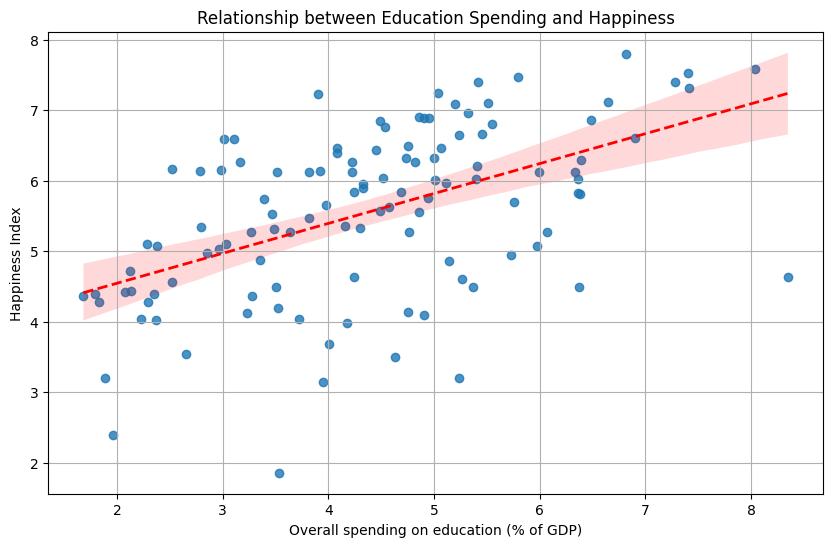

In [62]:

plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Overall spending on education (as % of GDP)',
            y='Happiness index',
            data=plot_df,
            scatter_kws={'alpha':0.8},
            line_kws={'color': 'red', 'linestyle': 'dashed', 'linewidth': 2})

plt.title('Relationship between Education Spending and Happiness')
plt.xlabel('Overall spending on education (% of GDP)')
plt.ylabel('Happiness Index')
plt.grid(True)
plt.show()


#### Question 2 

Is there a relationship between the amount that a country spends on tertiary education as a proportion of its GDP, and the happiness of that country's citizens?

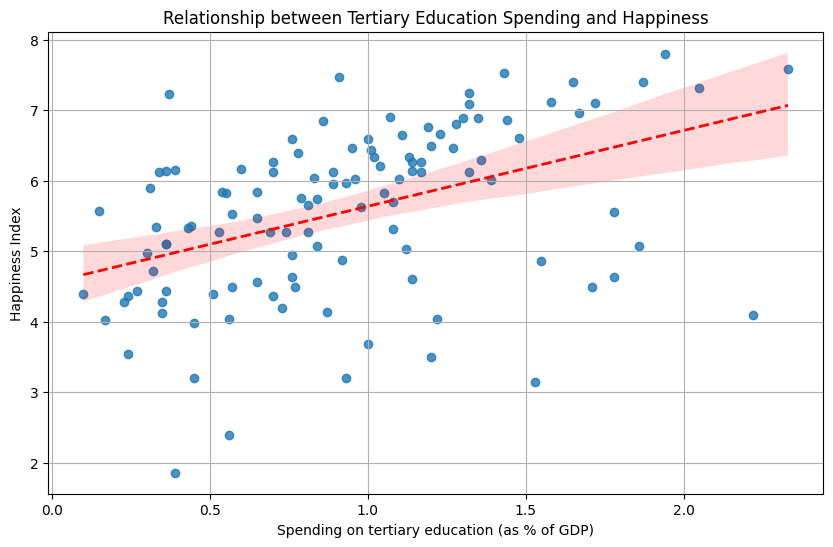

In [63]:

plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Spending on tertiary education (as % of GDP)',
            y='Happiness index',
            data=plot_df,
            scatter_kws={'alpha':0.8},
            line_kws={'color': 'red', 'linestyle': 'dashed', 'linewidth': 2})

plt.title('Relationship between Tertiary Education Spending and Happiness')
plt.xlabel('Spending on tertiary education (as % of GDP)')
plt.ylabel('Happiness Index')
plt.grid(True)
plt.show()


## Conclusion (Interpret the plots)

### Relationship between Overall spending on education and Happiness

The observed regression line in the plot implies a positive correlation between the overall spending on education (as a percentage of GDP) and the happiness index. This suggests that, on average, countries tend to experience higher happiness levels with increased investment in education. However, the presence of scattered outliers across the plot is noticeable and shows instances where this correlation is not consistently robust. 


### Relationship between Spending on Tertiary Education and Happiness

Similar to the previous scenario, the graph describing the relationship between spending on tertiary education and the happiness index reveals a positive correlation. This suggests that, on average, countries investing more in tertiary education tend to enjoy higher happiness levels. However, the correlation's strength is influenced by numerous outliers across the plot, rendering this correlation not consistently robust, much like the previous scenario.